In [2]:
#importing and displaying all the dataset used for the AI training and testing 

import pandas as pd
from tabulate import tabulate

diabetes_csv = pd.read_csv('diabetes.csv')
diabetes_csv_2 = pd.read_csv('RTML_with_Insulin.csv')
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        
pd.set_option('display.colheader_justify', 'center')
print(diabetes_csv)
print(diabetes_csv_2)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0         6         148         72             35            0    33.6            0.627           50      1   
1         1          85         66             29            0    26.6            0.351           31      0   
2         8         183         64              0            0    23.3            0.672           32      1   
3         1          89         66             23           94    28.1            0.167           21      0   
4         0         137         40             35          168    43.1            2.288           33      1   
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
763      10         101         76             48          180    32.9            0.171           63      0   
764       2         122         70             27            0    36.8            0.340           27      0   
7

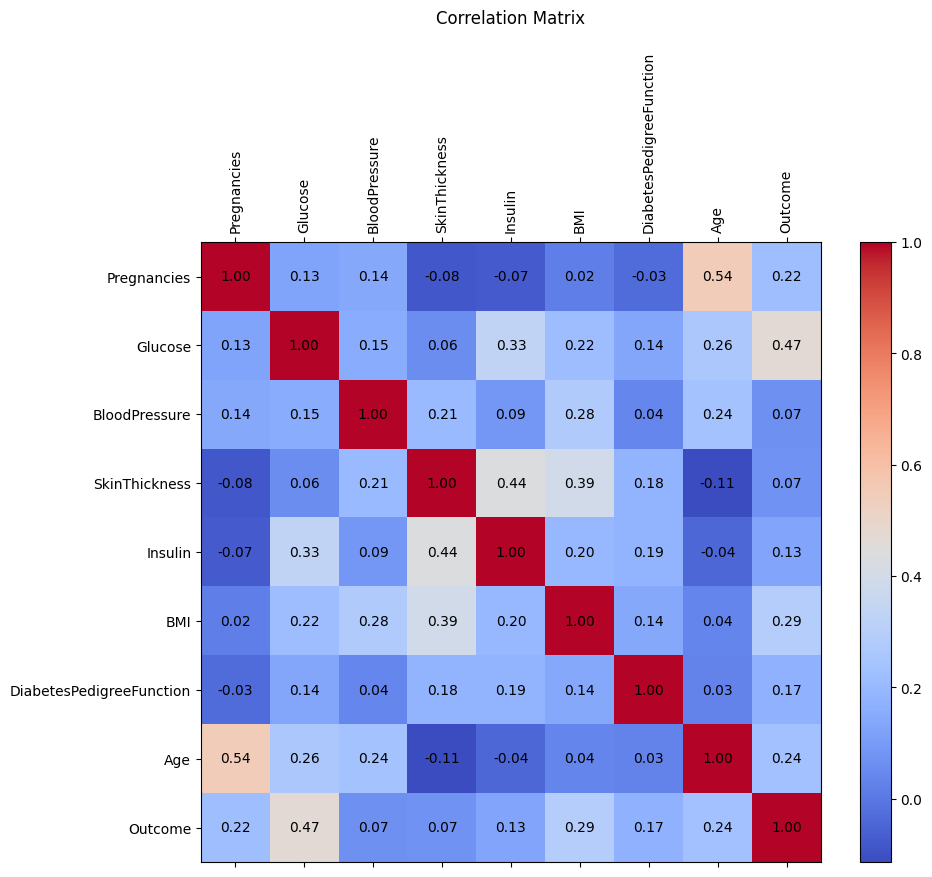

In [3]:
#Displaying the correlation of each attributes to the overall outcome (ex: diabetes/non-diabetes) in a form of heatmap 

import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = diabetes_csv.corr() #This line is use to compute the pearson correlation coefficient to be displayed 

#Plotting the correlation matrix 

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm') #This line is use to show the correlation in form of a heatmap 

plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)

plt.colorbar()

for i in range(correlation_matrix.shape[0]): 
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix', pad=20)
plt.show()


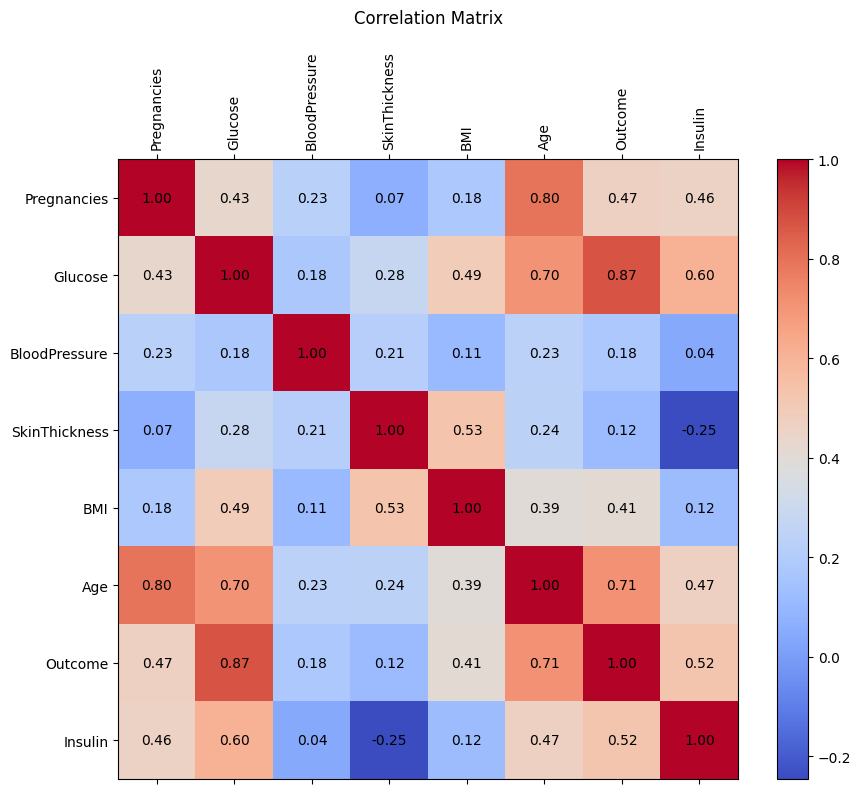

In [4]:
correlation_matrix = diabetes_csv_2.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')

plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)

plt.colorbar()

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix', pad=20)
plt.show()


In [5]:
#Since there is a difference in feature numbers between dataset 1 and 2, we need to drop the 'DiabetesPedigreeFunction' to work with both dataset
#The inital correlation of the DiabetePedigreeFunction to the Outcome itself is considered weak (0,17) (±0.10 to ±0.30 == weak correlation) so we can drop the column

diabetes_csv = diabetes_csv.drop('DiabetesPedigreeFunction', axis=1)
print(diabetes_csv)
print(type(diabetes_csv))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  Outcome
0         6         148         72             35            0    33.6  50      1   
1         1          85         66             29            0    26.6  31      0   
2         8         183         64              0            0    23.3  32      1   
3         1          89         66             23           94    28.1  21      0   
4         0         137         40             35          168    43.1  33      1   
..           ...      ...            ...            ...      ...   ...  ...      ...
763      10         101         76             48          180    32.9  63      0   
764       2         122         70             27            0    36.8  27      0   
765       5         121         72             23          112    26.2  30      0   
766       1         126         60              0            0    30.1  47      1   
767       1          93         70             31            0   

In [6]:
#Concating/combining the given datasets. We use the pandas library's function, pd.Concat, to combine the two datasets and rename it as diabetes_final 

diabetes_final = pd.concat([diabetes_csv, diabetes_csv_2], axis = 0)
diabetes_final.reset_index(drop=True, inplace=True)
print(diabetes_final)
print(type(diabetes_final))

     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin      BMI     Age  Outcome
0         6        148.0       72.0           35.0         0.00000  33.600000  50      1   
1         1         85.0       66.0           29.0         0.00000  26.600000  31      0   
2         8        183.0       64.0            0.0         0.00000  23.300000  32      1   
3         1         89.0       66.0           23.0        94.00000  28.100000  21      0   
4         0        137.0       40.0           35.0       168.00000  43.100000  33      1   
..           ...      ...            ...            ...        ...        ...  ...      ...
872       3        187.2       79.0            9.4       170.30719  26.899430  36      1   
873       2        149.4       82.0            9.8       158.69250  28.554780  44      1   
874       1        163.8       84.0            6.5       182.61160  31.000062  52      1   
875       4        167.4       86.0           11.7       166.97762  29.457447  5

In [7]:
#Before training the model, we need to do some data preprocessing 
#This section is use to calculate the NULL data in Insulin, Age, Glucose, BloodPressure, SkinThickness, and BMI. It is also use to calculate the value of < 0 Pregnancies
#This values need to be dealt with because they are 'out off bound' or out off the expected and accepted values 

negative_count_Insulin = (diabetes_final['Insulin'] <= 0).sum()
negative_count_Age = (diabetes_final['Age'] <= 0).sum()
negative_count_Pregnancies = (diabetes_final['Pregnancies'] < 0).sum()
negative_count_Glucose =(diabetes_final['Glucose'] <= 0).sum()
negative_count_BloodPressure =(diabetes_final['BloodPressure']<= 0).sum()
negative_count_SkinThickness = (diabetes_final['SkinThickness']<=0).sum()
negative_count_BMI =(diabetes_final['BMI']<=0).sum()

print(f'The number of negative values or zero values in the Insulin column is: {negative_count_Insulin}')
print(f'The number of negative values or zero values in the Age column is: {negative_count_Age}')
print(f'The number of negative values in the Pregnancies column is: {negative_count_Pregnancies}')
print(f'The number of negative values or zero values in the Glucose column is: {negative_count_Glucose}')
print(f'The number of negative values or zero values in the BloodPressure column is: {negative_count_BloodPressure}')
print(f'The number of negative values or zero values in the SkinThickness column is: {negative_count_SkinThickness}')
print(f'The number of negative values or zero values in the BMI column is: {negative_count_BMI}')

The number of negative values or zero values in the Insulin column is: 374
The number of negative values or zero values in the Age column is: 0
The number of negative values in the Pregnancies column is: 0
The number of negative values or zero values in the Glucose column is: 5
The number of negative values or zero values in the BloodPressure column is: 35
The number of negative values or zero values in the SkinThickness column is: 227
The number of negative values or zero values in the BMI column is: 11


In [8]:
#Because there are still alot of NULL datas inside both Insulin and SkinThickness column, we need to replace them 
#We choose to replace them according to their mean or median, that is why we need to calculate the skew of each data to determine if we need to use mean/median 
#If the data is mostly highly skewed we will use median as it is not severly affected by outliers, else, we will use mean --> to keep uniformity accross datas as 
#lowly skewed data can still be processed with median but not the highly skewed ones 
#To calculate the skew we will use the module scipy.stats from the scipy library 

from scipy.stats import skew

print(f"Skewess of Insulin: {diabetes_final['Insulin'].skew()}")
print(f"Skewess of Age: {diabetes_final['Age'].skew()}")
print(f"Skewness of Glucose: {diabetes_final['Glucose'].skew()}")
print(f"Skewness of BloodPressure: {diabetes_final['BloodPressure'].skew()}")
print(f"Skewness of BMI: {diabetes_final['BMI'].skew()}")
print(f"Skewness of SkinThickness: {diabetes_final['SkinThickness'].skew()}")

Skewess of Insulin: 2.149919563380124
Skewess of Age: 1.0991837851537438
Skewness of Glucose: 0.35197985472000565
Skewness of BloodPressure: -1.847707887672749
Skewness of BMI: -0.32855221228805886
Skewness of SkinThickness: 0.2934642192754777


In [3]:
#From the above result: 
#Skewess of Insulin: 2.149919563380124 (Highly Right Skewed)
#Skewess of Age: 1.0991837851537438 (Moderately Right Skewed)
#Skewness of Glucose: 0.35197985472000565 (Slightly Right Skewed)
#Skewness of BloodPressure: -1.847707887672749 (Highly left Skewed)
#Skewness of BMI: -0.32855221228805886 (Slightly left Skewed)
#Skewness of SkinThickness: 0.2934642192754777 (Slightly right Skewed)

#Since the skew shown that some of the datas are still Highly skewed. Because of this we will uniformly use median to replace the NULL datas. 


In [9]:
#Replacing NULL datas with each of their respective median 
#First we will use the data.median() function from pandas to calculate each median 

median_insulin = diabetes_final['Insulin'][diabetes_final['Insulin']>0].median()
median_age = diabetes_final['Age'][diabetes_final['Age']>0].median()
median_glucose = diabetes_final['Glucose'][diabetes_final['Glucose']>0].median()
median_bloodPressure = diabetes_final['BloodPressure'][diabetes_final['BloodPressure']>0].median()
median_BMI = diabetes_final['BMI'][diabetes_final['BMI']>0].median()
median_skinThickness = diabetes_final['SkinThickness'][diabetes_final['SkinThickness']>0].median()

print(f"the median insulin is: {median_insulin}")
print(f"the median age is: {median_age}")
print(f"the mean of glucose is: {median_glucose}")
print(f"the median of blood pressure is: {median_bloodPressure}")
print(f"the median of BMI is: {median_BMI}")
print(f"the median of skin thickness is: {median_skinThickness}")

the median insulin is: 126.0
the median age is: 29.0
the mean of glucose is: 114.0
the median of blood pressure is: 74.0
the median of BMI is: 31.2
the median of skin thickness is: 26.5


In [10]:
#After we calculate the median of each data columns, we replace it with the respective median
#We use the pandas' library function, data.apply()

diabetes_final['Age'] = diabetes_final['Age'].apply(lambda x: median_age if x<= 0 else x)
print(diabetes_final['Age'].apply(lambda x: median_age if x <= 0 else x).dtype) #--> print out the datatype of each column 
diabetes_final['Insulin'] = diabetes_final['Insulin'].apply(lambda x: median_insulin if x<=0 else x) 
print(diabetes_final['Insulin'].apply(lambda x: median_insulin if x <= 0 else x).dtype)
diabetes_final['Glucose'] = diabetes_final['Glucose'].apply(lambda x: median_glucose if x<=0 else x)
print(diabetes_final['Glucose'].apply(lambda x: median_glucose if x <= 0 else x).dtype)
diabetes_final['BloodPressure'] = diabetes_final['BloodPressure'].apply(lambda x: median_bloodPressure if x<=0 else x)
print(diabetes_final['BloodPressure'].apply(lambda x: median_bloodPressure if x <= 0 else x).dtype)
diabetes_final['BMI'] = diabetes_final['BMI'].apply(lambda x: median_BMI if x<=0 else x)
print(diabetes_final['BMI'].apply(lambda x: median_BMI if x <= 0 else x).dtype)
diabetes_final['SkinThickness'] = diabetes_final['SkinThickness'].apply(lambda x: median_skinThickness if x<=0 else x)
print(diabetes_final['SkinThickness'].apply(lambda x: median_skinThickness if x <= 0 else x).dtype)

print(diabetes_final)
print(type(diabetes_final)) #print the type of the dataset -> must be on DataFrame format 

int64
float64
float64
float64
float64
float64
     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin      BMI     Age  Outcome
0         6        148.0       72.0           35.0       126.00000  33.600000  50      1   
1         1         85.0       66.0           29.0       126.00000  26.600000  31      0   
2         8        183.0       64.0           26.5       126.00000  23.300000  32      1   
3         1         89.0       66.0           23.0        94.00000  28.100000  21      0   
4         0        137.0       40.0           35.0       168.00000  43.100000  33      1   
..           ...      ...            ...            ...        ...        ...  ...      ...
872       3        187.2       79.0            9.4       170.30719  26.899430  36      1   
873       2        149.4       82.0            9.8       158.69250  28.554780  44      1   
874       1        163.8       84.0            6.5       182.61160  31.000062  52      1   
875       4        167.4       86.

In [11]:
#Once again calculate the NULL or negative value (to make sure there is none left before we proceed) 

zero_or_negative_values = (diabetes_final[['Age', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'SkinThickness']] <= 0).sum()

print("Count of zero or negative values in each column after imputation:")
print(zero_or_negative_values)

#Find the rows with NULL or negative value (if exist)
rows_with_zero_or_negative = diabetes_final[(diabetes_final[['Age', 'Insulin', 'Glucose', 'BloodPressure', 'BMI', 'SkinThickness']] <= 0).any(axis=1)]
print("\nRows with zero or negative values after imputation:")
print(rows_with_zero_or_negative)

Count of zero or negative values in each column after imputation:
Age              0
Insulin          0
Glucose          0
BloodPressure    0
BMI              0
SkinThickness    0
dtype: int64

Rows with zero or negative values after imputation:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age, Outcome]
Index: []


In [12]:
#Because some of the skew is still high, there is a probability of an existing outliers (datas that are much larger or much smaller than the majority values)
#This may cause further distortion with the final analysis if we don't deal with it during the preprocessing step 
#For the outlier detection we will use a box-plot and IQR method 
#First we will calculate the Q1 and Q3 of our data as the 'initial bound' 
#Then we will calculate the IQR (Interquartile Range) -> Q3-Q1 to show the data spread accross 50% of the datas while still including the lower halves (Q1) and upper halves (Q3)
#We detect any outliers if the data is lower than the lower bound (lower_bound = Q1 - 1.5 * IQR) or higher than the upper bound (upper_bound = Q3 + 1.5 * IQR)

def detect_outliers_iqr(diabetes_final):
    exclude_columns = ['Pregnancies', 'Age', 'Outcome'] #--> we exclude this columns because the datas will not be truly represented if the clip the outliers 
    
    outlier_count = {}
    for column in diabetes_final:
        if column in exclude_columns:
            continue

        Q1 = diabetes_final[column].quantile(0.25)
        Q3 = diabetes_final[column].quantile(0.75)

        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 

        outliers = diabetes_final[(diabetes_final[column] < lower_bound) | (diabetes_final[column] > upper_bound)]
        outlier_count[column] = len(outliers)

        print(f'The {column} lower bound is: {lower_bound}')
        print(f'The {column} upper bound is: {upper_bound}')

    return outlier_count 

outliers_in_data = detect_outliers_iqr(diabetes_final)
for column, count in outliers_in_data.items():
    print(f"Column '{column}' has {count} outliers")



The Glucose lower bound is: 30.000000000000014
The Glucose upper bound is: 204.39999999999998
The BloodPressure lower bound is: 43.5
The BloodPressure upper bound is: 103.5
The SkinThickness lower bound is: 3.5
The SkinThickness upper bound is: 47.5
The Insulin lower bound is: 71.49084749999999
The Insulin upper bound is: 180.0903075
The BMI lower bound is: 11.783600100000005
The BMI upper bound is: 50.36983993999999
Column 'Glucose' has 4 outliers
Column 'BloodPressure' has 22 outliers
Column 'SkinThickness' has 21 outliers
Column 'Insulin' has 221 outliers
Column 'BMI' has 9 outliers


In [13]:
#After knowing the lower bound and upper bound, and also knowing the number of outliers inside the datas, we are going to clip (limit) the outlier datas by further changing it's 
#Value to either the lower_bound or higher_bound according to their respective case. 
#Then we will once more call the detect_ouliers function to make sure there is no further outliers 

def clip_outliers(diabetes_final):
    exclude_columns = ['Pregnancy', 'Outcome', 'Age']
    
    df_clipped = diabetes_final.copy()
    for column in diabetes_final.columns:
        if column in exclude_columns:
            continue

        Q1 = diabetes_final[column].quantile(0.25)
        Q3 = diabetes_final[column].quantile(0.75)

        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 

        df_clipped[column] = diabetes_final[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_clipped

diabetes_final= clip_outliers(diabetes_final)
print(diabetes_final)
print(type(diabetes_final))

outliers_in_data = detect_outliers_iqr(diabetes_final)
for column, count in outliers_in_data.items():
    print(f"Column '{column}' has {count} outliers")


     Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin      BMI     Age  Outcome
0        6.0       148.0       72.0           35.0       126.000000  33.600000  50      1   
1        1.0        85.0       66.0           29.0       126.000000  26.600000  31      0   
2        8.0       183.0       64.0           26.5       126.000000  23.300000  32      1   
3        1.0        89.0       66.0           23.0        94.000000  28.100000  21      0   
4        0.0       137.0       43.5           35.0       168.000000  43.100000  33      1   
..           ...      ...            ...            ...         ...        ...  ...      ...
872      3.0       187.2       79.0            9.4       170.307190  26.899430  36      1   
873      2.0       149.4       82.0            9.8       158.692500  28.554780  44      1   
874      1.0       163.8       84.0            6.5       180.090307  31.000062  52      1   
875      4.0       167.4       86.0           11.7       166.977620  2

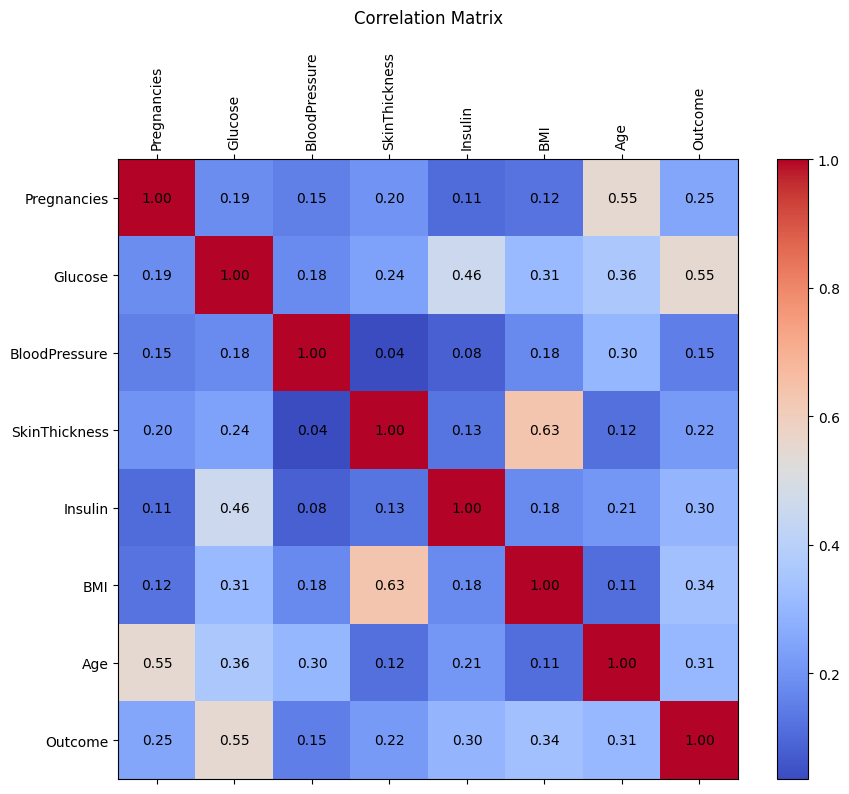

In [14]:
#After the data preprocessing, we will once more print the correlation matrix of our final dataset 

correlation_matrix = diabetes_final.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')

plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)

plt.colorbar()

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix', pad=20)
plt.show()

In [15]:
#Check if our data is heavily inbalanced or not before proceeding with the training  
#If the data is heavily imbalanced, it might be biased to one side of an outcome 

diabetes_counts = diabetes_final['Outcome'].value_counts()

print(f"Negative diabetes cases (0): {diabetes_counts[0]}")
print(f"Positive diabetes cases (1): {diabetes_counts[1]}")

Negative diabetes cases (0): 586
Positive diabetes cases (1): 291


In [16]:
#Because the data is heavily imbalanced, we are going to balanced the data using SMOTE method
#But before that, we need to split the datas into the training and the testing data, we will use the sklearn library module (sklearn.model_selection) train_test_split 
#We then apply SMOTE using the imblearn module (imblearn.over_sampling) SMOTE to form synthetic datas to balanced the negative and postive cases 

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = diabetes_final.drop('Outcome', axis=1)
y = diabetes_final['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(type(X))
print(type(y))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Class distribution before SMOTE:
 Outcome
0    439
1    218
Name: count, dtype: int64
Class distribution after SMOTE:
 Outcome
0    439
1    439
Name: count, dtype: int64


In [17]:
#Normalizing the data used for training 

from sklearn.preprocessing import MinMaxScaler

all_columns = ['BloodPressure', 'BMI', 'SkinThickness', 'Insulin', 'Glucose', 'Pregnancies', 'Age']

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train_resampled[all_columns])
print(type(X_train_normalized))

X_test_normalized = scaler.transform(X_test[all_columns])
print(type(X_test_normalized))

X_train_combined = pd.DataFrame(X_train_normalized, columns=all_columns)
print(type(X_train_combined))

X_test_combined = pd.DataFrame(X_test_normalized, columns=all_columns)
print(type(X_test_combined))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
#Using random forest algorithm to make predictions 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

n_train = 1000
n_estimators_per_train = 600

all_predictions = []
all_accuracies = []

for train in range(n_train):
    X_train_sampled, y_train_sampled = resample(X_train_combined, y_train_resampled)

    rf = RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=n_estimators_per_train, random_state=42)
    rf.fit(X_train_sampled, y_train_sampled)

    y_pred_train = rf.predict(X_test_combined)
    all_predictions.append(y_pred_train)

    accuracy = accuracy_score(y_test, y_pred_train)
    all_accuracies.append(accuracy)

best_index = np.argmax(all_accuracies)
best_accuracy = all_accuracies[best_index]
best_predictions = all_predictions[best_index]

print(f"Best Accuracy: {best_accuracy}")
print(classification_report(y_test, best_predictions))


Best Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       147
           1       0.73      0.73      0.73        73

    accuracy                           0.82       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.82      0.82      0.82       220



In [21]:
#cross validation is used to distinguish how the model works on the training datas as for to the predict() where it is used for the testing data 

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
scores = cross_val_score(rf, X_train_combined, y_train_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean()}")


Cross-Validation Accuracy Scores: [0.82954545 0.77272727 0.82386364 0.87428571 0.88      ]
Mean CV Accuracy: 0.8360844155844156


In [22]:
final_rf_model = RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600, random_state=42)
final_rf_model.fit(X_train_combined, y_train_resampled)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600,
                       random_state=42)

In [23]:
#For the AI model, since we use preprocessing method, we will also need to make the preprocessing model to make sure the AI model works correctly.
#This includes the outliers clipping and the normalization that we done 

def clip_outliers(data, lower_percentile=0.25, upper_percentile=0.75, factor=1.5):
    df_clipped = data.copy()
    for column in df_clipped.columns:
        Q1 = df_clipped[column].quantile(lower_percentile)
        Q3 = df_clipped[column].quantile(upper_percentile)
        IQR = Q3 - Q1

        lower_bound = Q1 - (factor * IQR)
        upper_bound = Q3 + (factor * IQR)

        df_clipped[column] = np.clip(df_clipped[column], lower_bound, upper_bound)
    
    return df_clipped


In [24]:
#Creating the preprocessing pipeline 

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import joblib

clip_transformer = FunctionTransformer(clip_outliers, validate=False, kw_args={'lower_percentile': 0.25, 'upper_percentile': 0.75, 'factor': 1.5})

preprocessing_pipeline = Pipeline([
    ('clipper', clip_transformer),  
    ('scaler', MinMaxScaler())      
])

preprocessing_pipeline.fit(X_train_resampled)

X_train_normalized = preprocessing_pipeline.transform(X_train_resampled)
X_test_normalized = preprocessing_pipeline.transform(X_test)

joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline1.pkl')
print(type(preprocessing_pipeline))


<class 'sklearn.pipeline.Pipeline'>


In [25]:
#creating the AI model 
joblib.dump(final_rf_model, 'final_rff_model.pkl')

['final_rff_model.pkl']